# Wstępna analiza daych

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features
y = heart_disease.data.targets

data = X.join(y)
  
print(heart_disease.variables) 


        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [3]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [4]:
y.describe()

,num
count,303.000000
mean,0.937294
std,1.228536
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,4.000000


### Rozkład diagnoz

<Axes: title={'center': 'Rozkład diagnoz'}, ylabel='count'>

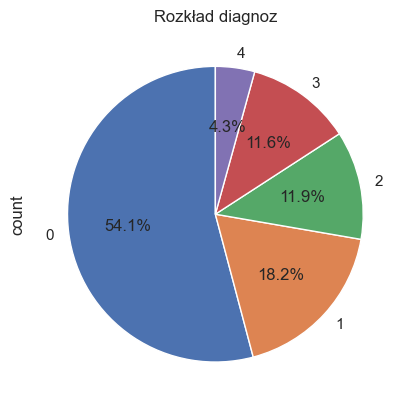

In [5]:
labels = y.value_counts().index

values_counts = y.value_counts()
values_counts.plot(kind='pie', labels=[x[0] for x in values_counts.index.tolist()], autopct='%1.1f%%', startangle=90, title='Rozkład diagnoz')

W przypadku większości innych badań na zbiorze danych ograniczono się jedynie do stwerdzenia istnienia choroby serca. Rożróznienie wartości 0 lub innej. W takim przypadku zbiór danych jest stosunkowo zbalasnowany. Natomiast w przypadku uwzględnienia klasyfikacji różnych chorób zbiór ten już nie jest zbalansowany. Co może skutkować niższą dokładnością modelu

# Korelacja

In [6]:
numerical_data = X[["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]]
categorical_data = X[["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]].join(y)

<Axes: title={'center': 'Korelacja atrybutów zbioru danych wraz z diagnozą (num)'}>

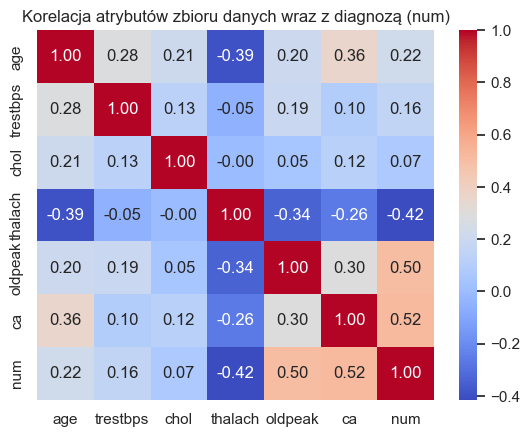

In [14]:
data = X.join(y)

plt.title("Korelacja atrybutów zbioru danych wraz z diagnozą (num)")
sns.heatmap(pd.DataFrame(numerical_data.join(y)).corr(), annot=True, fmt=".2f", cmap='coolwarm')



Ze względu na 

# Rozkłady wartości ciągłych

Text(0.5, 1.0, 'Rozkład liczby głównych naczyń (0-3) zabarwionych fluorosopią (ca)')

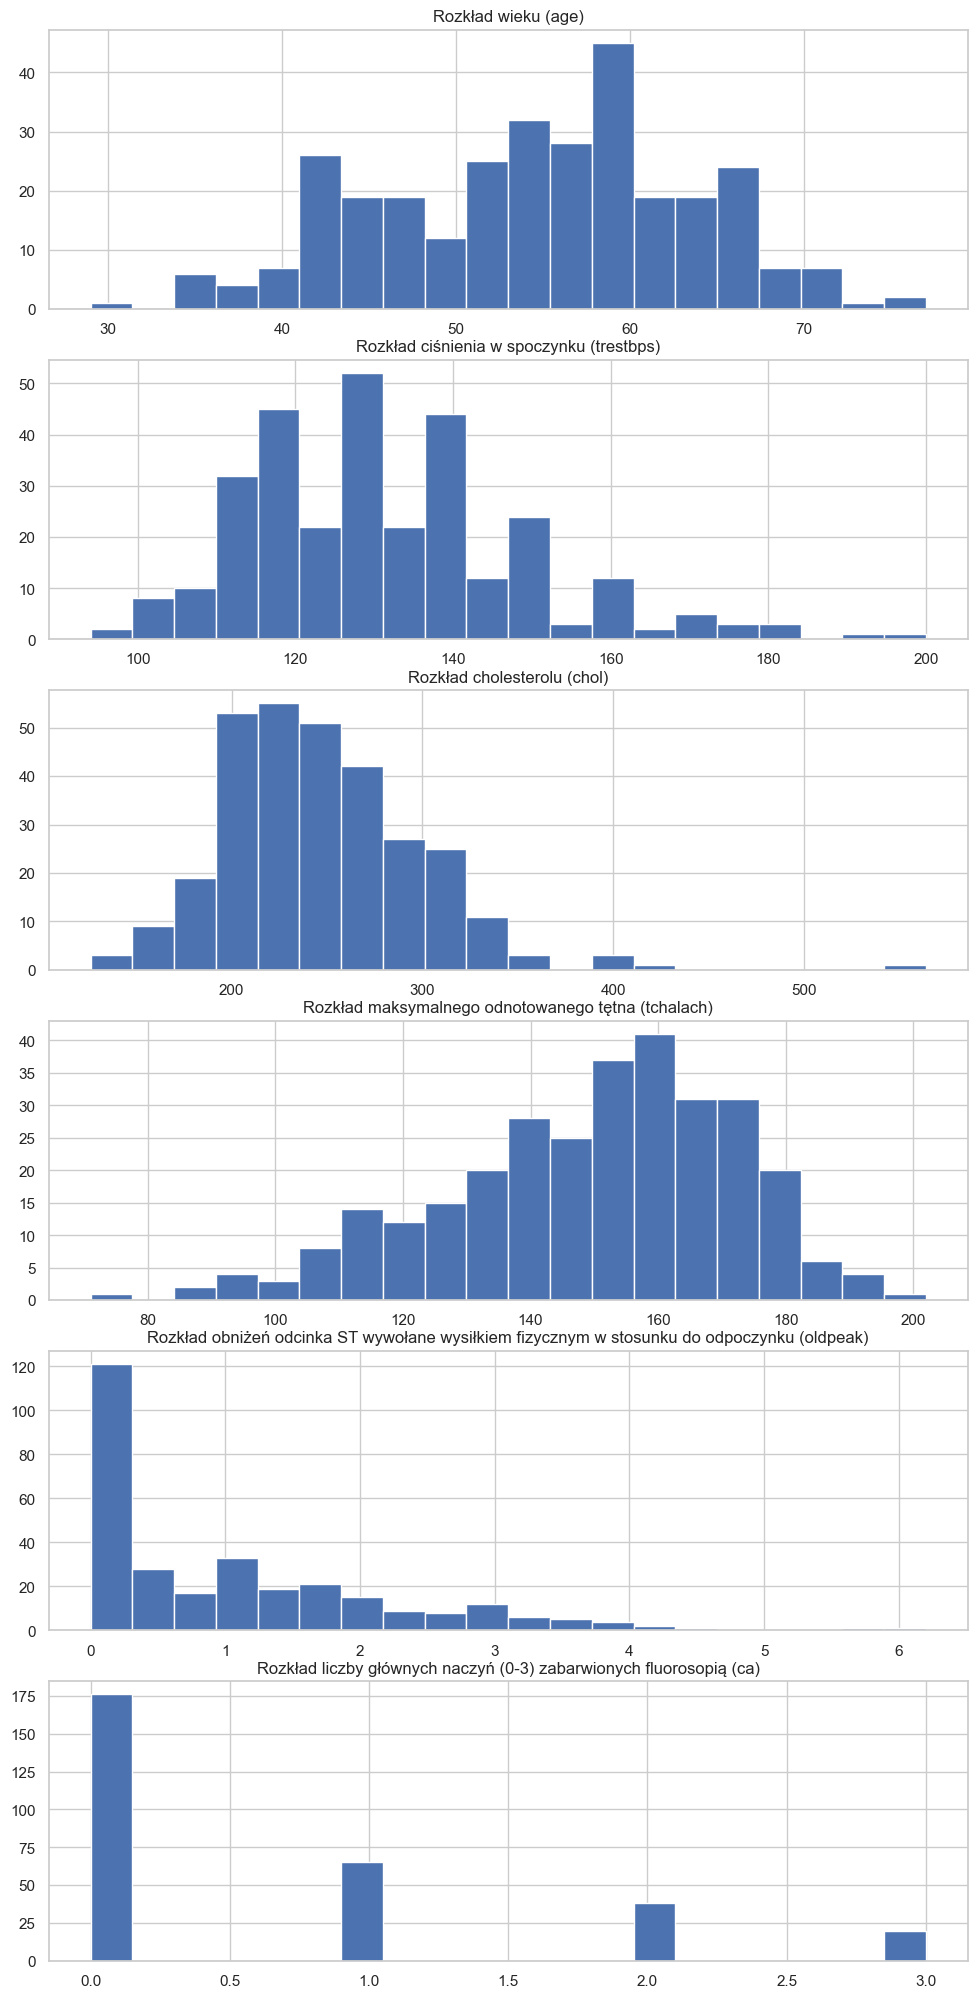

In [8]:
fig, ax = plt.subplots(6, 1, figsize=(10,20))
fig.tight_layout()
ax[0].hist(X.age, bins=20)
ax[0].set_title("Rozkład wieku (age)")
ax[1].hist(X.trestbps, bins=20)
ax[1].set_title("Rozkład ciśnienia w spoczynku (trestbps)")
ax[2].hist(X.chol, bins=20)
ax[2].set_title("Rozkład cholesterolu (chol)")
ax[3].hist(X.thalach, bins=20)
ax[3].set_title("Rozkład maksymalnego odnotowanego tętna (tchalach)")
ax[4].hist(X.oldpeak, bins=20)
ax[4].set_title("Rozkład obniżeń odcinka ST wywołane wysiłkiem fizycznym w stosunku do odpoczynku (oldpeak)")
ax[5].hist(X.ca, bins=20)
ax[5].set_title("Rozkład liczby głównych naczyń (0-3) zabarwionych fluorosopią (ca)")



### Testy na rozkład normalny
Przeprowadzono również testy statystynczne na rozkład normalny. Testem poddano zmienne: age, terstbps, chol, tchalach. Zdecydowano się przeprowadzić również test Shapiro-Wilka


In [9]:
from scipy.stats import normaltest

def test_normality(data, variable_name, alpha=0.05):
    stat, p = normaltest(data)
    print('='*12)
    print('Statystyka=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print(f'Zmienna numeryczna "{variable_name}" jest rozkładem normalnym na poziomie istotności alpha={alpha}')
    else:
        print(f'Zmienna numerczyna "{variable_name}" nie jest rozkładem normalnym na poziomie istotności alpha={alpha}')

for column in numerical_data.columns:
    test_normality(numerical_data[column], column)

Statystyka=8.243, p=0.016
Zmienna numerczyna "age" nie jest rozkładem normalnym na poziomie istotności alpha=0.05
Statystyka=27.695, p=0.000
Zmienna numerczyna "trestbps" nie jest rozkładem normalnym na poziomie istotności alpha=0.05
Statystyka=82.947, p=0.000
Zmienna numerczyna "chol" nie jest rozkładem normalnym na poziomie istotności alpha=0.05
Statystyka=13.463, p=0.001
Zmienna numerczyna "thalach" nie jest rozkładem normalnym na poziomie istotności alpha=0.05
Statystyka=66.620, p=0.000
Zmienna numerczyna "oldpeak" nie jest rozkładem normalnym na poziomie istotności alpha=0.05
Statystyka=nan, p=nan
Zmienna numerczyna "ca" nie jest rozkładem normalnym na poziomie istotności alpha=0.05


Żadna ze zmiennych numerycznych nie okazała się rozkładem być rozkładem normalnym

# Rozkłady zmiennych kategorycznych

Text(0.5, 1.0, 'Rozkład diagnoz')

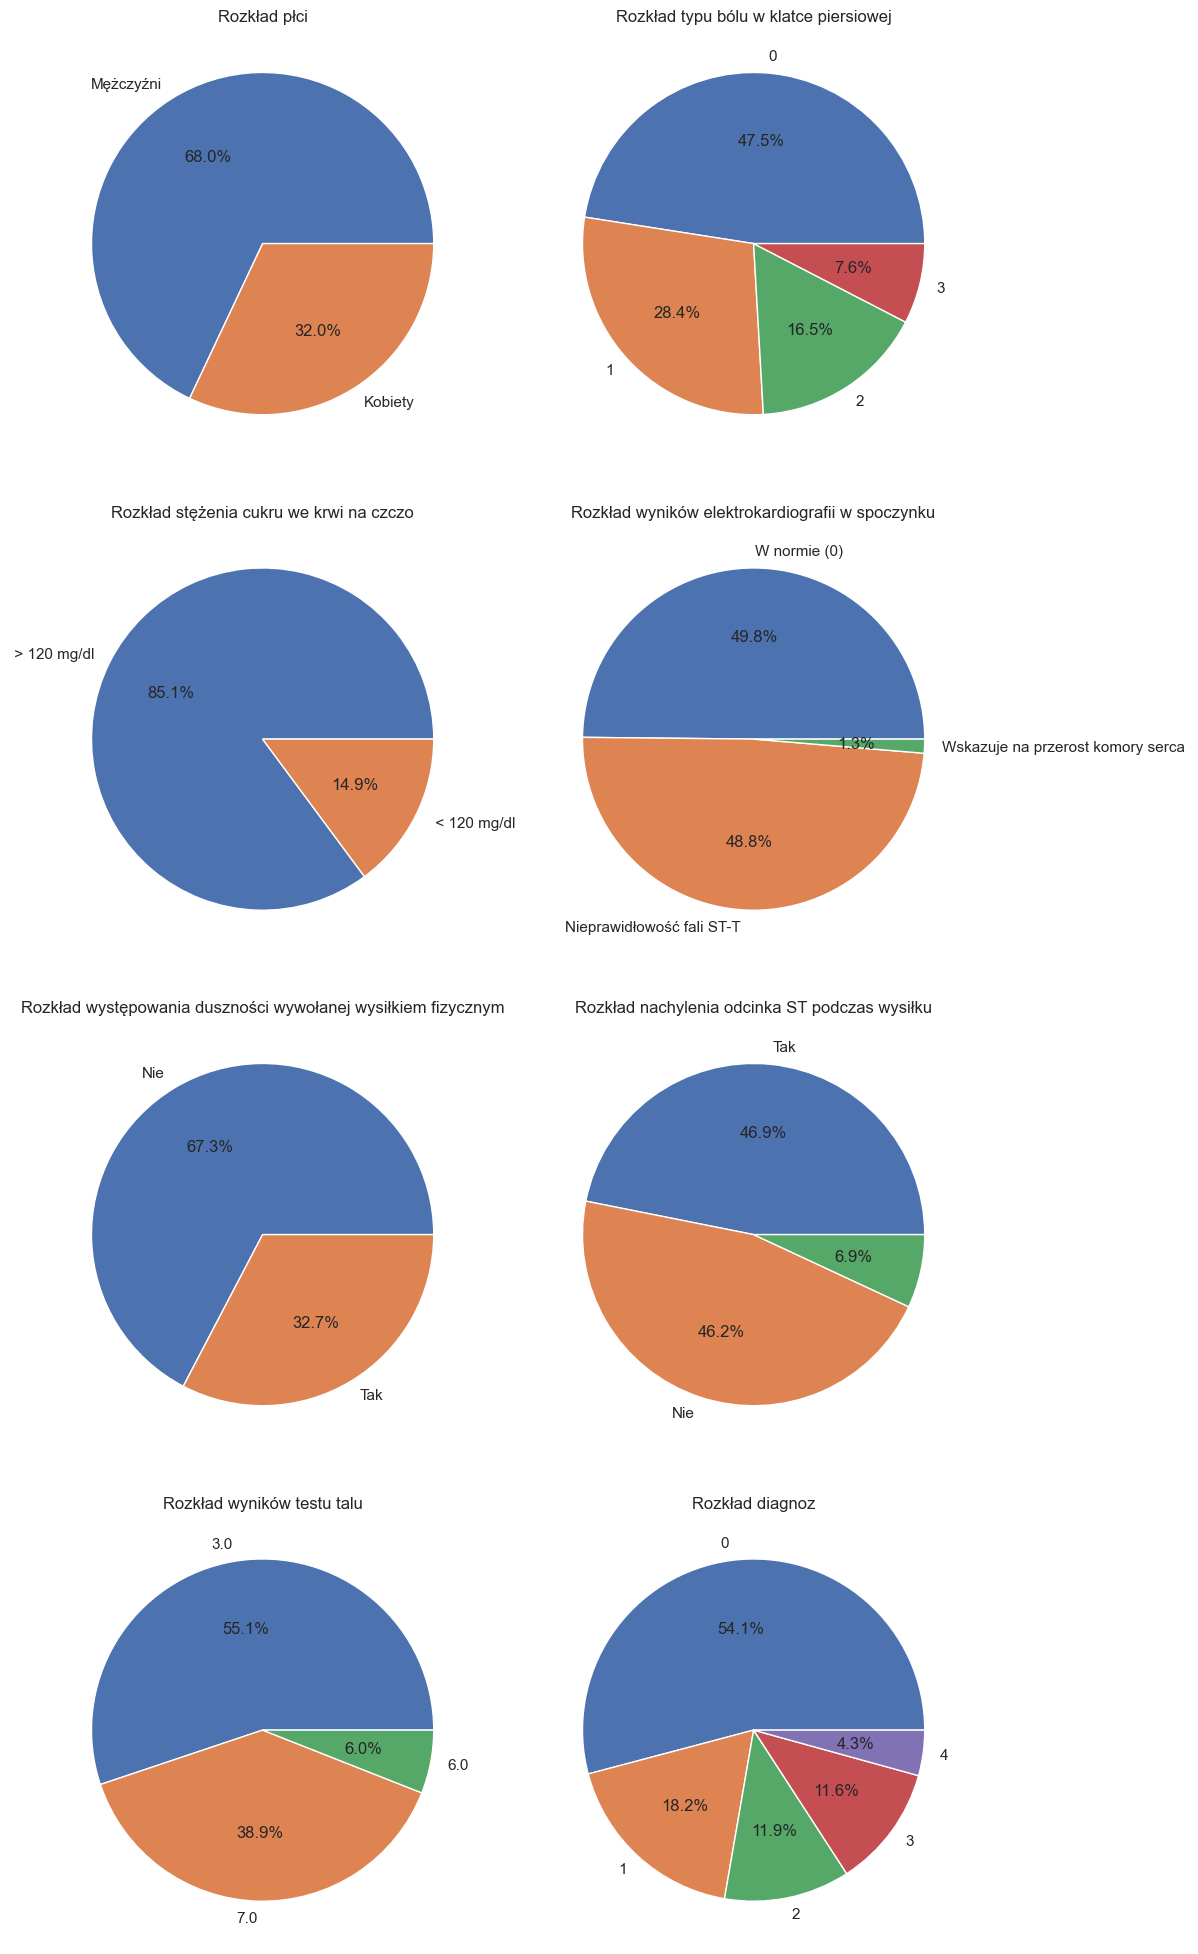

In [31]:
fig, ax = plt.subplots(4, 2, figsize=(10,20))
fig.tight_layout()
ax[0][0].pie(X['sex'].value_counts(), labels=['Mężczyźni', 'Kobiety'], autopct='%1.1f%%')
ax[0][0].set_title("Rozkład płci")
ax[0][1].pie(X['cp'].value_counts(), labels=['0', '1', '2', '3'], autopct='%1.1f%%')
ax[0][1].set_title("Rozkład typu bólu w klatce piersiowej")
ax[1][0].pie(X['fbs'].value_counts(), labels=[' > 120 mg/dl', ' < 120 mg/dl'], autopct='%1.1f%%')
ax[1][0].set_title("Rozkład stężenia cukru we krwi na czczo")
ax[1][1].pie(X['restecg'].value_counts(), labels=['W normie (0)', 'Nieprawidłowość fali ST-T ', 'Wskazuje na przerost komory serca '], autopct='%1.1f%%')
ax[1][1].set_title("Rozkład wyników elektrokardiografii w spoczynku")
ax[2][0].pie(X['exang'].value_counts(), labels=['Nie', 'Tak'], autopct='%1.1f%%')
ax[2][0].set_title("Rozkład występowania duszności wywołanej wysiłkiem fizycznym")
ax[2][1].pie(X['slope'].value_counts(), labels=['wznoszące się', 'płaskie', 'opadające'], autopct='%1.1f%%')
ax[2][1].set_title("Rozkład nachylenia odcinka ST podczas wysiłku")
ax[3][0].pie(X['thal'].value_counts(), labels=X['thal'].value_counts().index, autopct='%1.1f%%')
ax[3][0].set_title("Rozkład wyników testu talu")
ax[3][1].pie(y.value_counts(), labels=[x[0] for x in y.value_counts().index.tolist()], autopct='%1.1f%%')
ax[3][1].set_title("Rozkład diagnoz")

## Test V Crammera dla zmiennych kategorycznych i diagnoz

In [ ]:
# Rozkłady zmiennych kategorycznych